In [1]:
# install tflite model maker
!pip install tflite-model-maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 642 kB 5.3 MB/s 
     |████████████████████████████████| 120 kB 67.3 MB/s 
     |████████████████████████████████| 1.1 MB 61.0 MB/s 
     |████████████████████████████████| 77 kB 7.6 MB/s 
     |████████████████████████████████| 237 kB 72.1 MB/s 
     |████████████████████████████████| 87 kB 9.8 MB/s 
     |████████████████████████████████| 1.2 MB 50.4 MB/s 
     |████████████████████████████████| 596 kB 68.7 MB/s 
     |████████████████████████████████| 3.4 MB 55.1 MB/s 
     |████████████████████████████████| 840 kB 67.0 MB/s 
     |████████████████████████████████| 10.9 MB 25.4 MB/s 
     |████████████████████████████████| 42.5 MB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 57.2 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 352 kB 65.6 MB/s 
     |█████████████████████████████

In [2]:
# install libportaudio2
!sudo apt-get install libportaudio2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 0s (360 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [3]:
# import libraries needed
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

from tflite_model_maker import model_spec
from tflite_model_maker.config import QuantizationConfig

from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# extract zip file dataset
!unzip "/content/drive/MyDrive/dataset/DATASET TANAMAN HERBAL.zip"

Archive:  /content/drive/MyDrive/dataset/DATASET TANAMAN HERBAL.zip
   creating: DATASET TANAMAN HERBAL/Daun Jambu Biji/
  inflating: DATASET TANAMAN HERBAL/Daun Jambu Biji/jambu biji (1).JPG  
  inflating: DATASET TANAMAN HERBAL/Daun Jambu Biji/jambu biji (10).JPG  
  inflating: DATASET TANAMAN HERBAL/Daun Jambu Biji/jambu biji (100).JPG  
  inflating: DATASET TANAMAN HERBAL/Daun Jambu Biji/jambu biji (11).JPG  
  inflating: DATASET TANAMAN HERBAL/Daun Jambu Biji/jambu biji (12).JPG  
  inflating: DATASET TANAMAN HERBAL/Daun Jambu Biji/jambu biji (13).JPG  
  inflating: DATASET TANAMAN HERBAL/Daun Jambu Biji/jambu biji (14).JPG  
  inflating: DATASET TANAMAN HERBAL/Daun Jambu Biji/jambu biji (15).JPG  
  inflating: DATASET TANAMAN HERBAL/Daun Jambu Biji/jambu biji (16).JPG  
  inflating: DATASET TANAMAN HERBAL/Daun Jambu Biji/jambu biji (17).JPG  
  inflating: DATASET TANAMAN HERBAL/Daun Jambu Biji/jambu biji (18).JPG  
  inflating: DATASET TANAMAN HERBAL/Daun Jambu Biji/jambu biji (1

In [8]:
# checking amount of data in each label
print("Daun Jambu Biji: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Daun Jambu Biji")))
print("Daun Kari: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Daun Kari")))
print("Daun Kemangi: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Daun Kemangi")))
print("Daun Kunyit: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Daun Kunyit")))
print("Daun Mint: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Daun Mint")))
print("Daun Pepaya: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Daun Pepaya")))
print("Daun Sirih: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Daun Sirih")))
print("Daun Sirsak: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Daun Sirsak")))
print("Lidah Buaya: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Lidah Buaya")))
print("Teh Hijau: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Teh Hijau")))

Daun Jambu Biji:  100
Daun Kari:  100
Daun Kemangi:  100
Daun Kunyit:  100
Daun Mint:  100
Daun Pepaya:  100
Daun Sirih:  100
Daun Sirsak:  100
Lidah Buaya:  100
Teh Hijau:  100


In [9]:
# load the dataset and split it into train, validation and test dataset with 8:1:1 ratio
data = DataLoader.from_folder('/content/DATASET TANAMAN HERBAL')
train_dataset, x = data.split(0.8)
validation_dataset, test_dataset = x.split(0.5)

INFO:tensorflow:Load image with size: 1000, num_label: 10, labels: Daun Jambu Biji, Daun Kari, Daun Kemangi, Daun Kunyit, Daun Mint, Daun Pepaya, Daun Sirih, Daun Sirsak, Lidah Buaya, Teh Hijau.


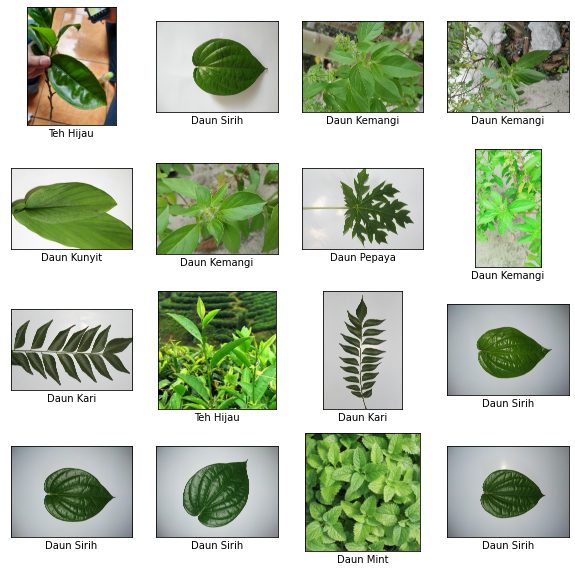

In [10]:
# display some image examples from dataset
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(16)):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [11]:
# adding augmentation to increase model accuracy
augmentation = keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal",
                                                                              input_shape=(224, 224, 3)),
                                 layers.experimental.preprocessing.RandomRotation(0.1),
                                 layers.experimental.preprocessing.RandomZoom(0.1),
                                 layers.experimental.preprocessing.Rescaling(1/255.)
                                 ])                

In [14]:
inception_v3_spec = image_classifier.ModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

In [15]:
# define the transfer learning model with MobileNetV2 CNN architecture
model = image_classifier.create(train_dataset,
                                model_spec=inception_v3_spec,
                                validation_data=validation_dataset,
                                batch_size=32,
                                epochs=30,
                                dropout_rate=0.2,
                                learning_rate=0.0001,
                                momentum=0.9,
                                shuffle=1000,
                                use_augmentation=augmentation)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 2048)             21802784  
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 21,823,274
Trainable params: 20,490
Non-trainable params: 21,802,784
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
25/25 [==============================] - 117s 4s/step - loss: 2.3532 - accuracy: 0.1637 - val_loss: 2.2539 - val_accuracy: 0.1700
Epoch 2/30
25/25 [==============================] - 113s 4s/step - loss: 2.1994 - accuracy: 0.2100 - val_loss: 2.1460 - val_accuracy: 0.2100
Epoch 3/30
25/25 [==============================] - 110s 4s/step - loss: 2.0736 - accuracy: 0.3000 - val_loss: 2.0551 - val_accuracy: 0.2500
Epoch 4/30
25/25 [==============================] - 110s 4s/step - loss: 1.9876 - accuracy: 0.3450 - val_loss: 1.9678 - val_accuracy: 0.3500
Epoch 5/30
25/25 [==============================] - 112s 4s/step - loss: 1.9107 - accuracy: 0.3837 - val_loss: 1.8850 - val_accuracy: 0.4700
Epoch 6/30
25/25 [==============================] - 111s 4s/step - loss: 1.8107 - accuracy: 0.4675 - val_loss: 1.8026 - val_accuracy: 0.5600
Epoch 7/30
25/25 [==============================] - 111s 4s/step - loss: 1.7485 - accuracy: 0.5337 - val_loss: 1.7298 - val_accuracy: 0.5900
Epoch 8/30
25

In [16]:
# evaluate the test_dataset
loss, accuracy = model.evaluate(test_dataset)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


4/4 [==============================] - 64s 3s/step - loss: 0.8581 - accuracy: 0.9400


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


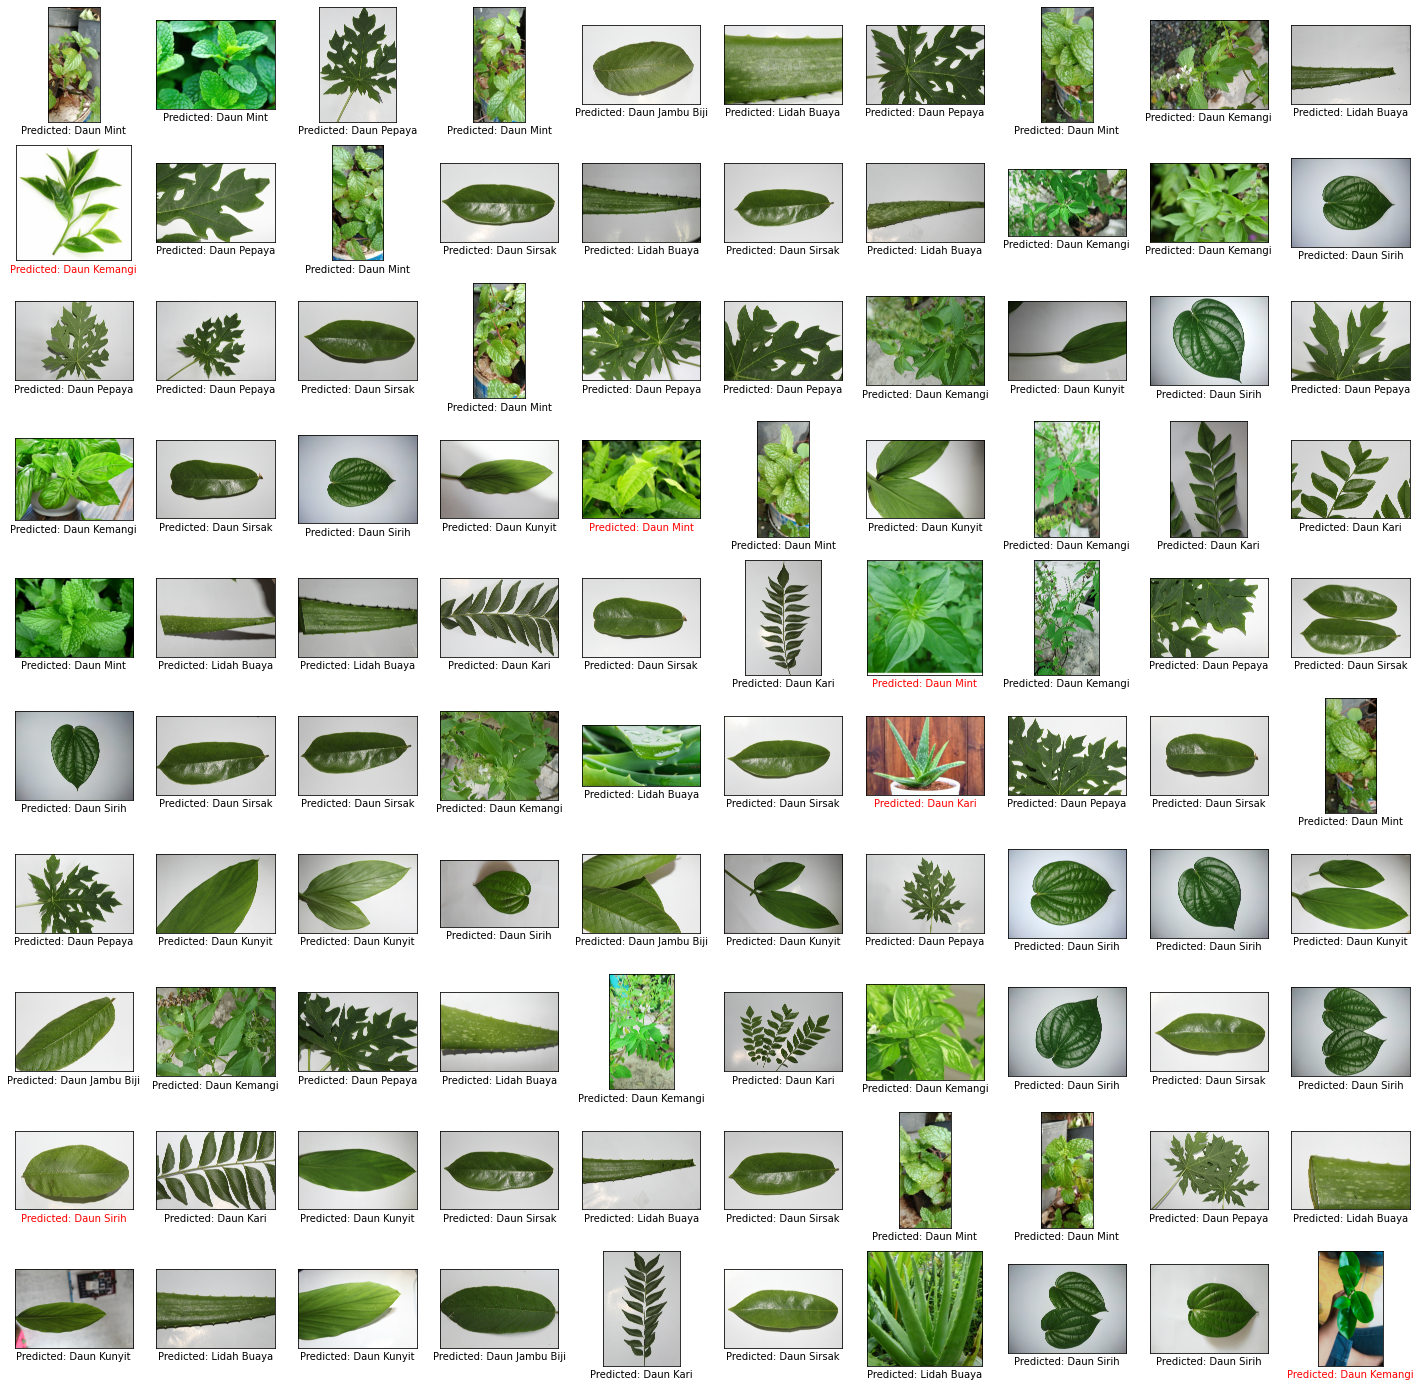

In [17]:
# define function to return black=True and red=False in prediction result
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# display 100 test images and their predicted labels
plt.figure(figsize=(25, 25))
predicts = model.predict_top_k(test_dataset)
for i, (image, label) in enumerate(test_dataset.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_dataset.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [18]:
# post training quantization to reduce model size and inference latency
config = QuantizationConfig.for_float16()

In [21]:
# export the TensorFlow Lite model
model.export(export_dir='paranmo', tflite_filename='BestModelParanmoFinal.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmpvwcijo9i/assets


INFO:tensorflow:Assets written to: /tmp/tmpvwcijo9i/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp25eujpy4/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp25eujpy4/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: paranmo/BestModelParanmoFinal.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: paranmo/BestModelParanmoFinal.tflite


In [22]:
# evaluate the tflite model with the evaluate_tflite method
model.evaluate_tflite('paranmo/BestModelParanmoFinal.tflite', test_dataset)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


{'accuracy': 0.94}

In [23]:
# download the tflite file
try:
    from google.colab import files
    files.download('paranmo/BestModelParanmoFinal.tflite')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>